In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("../data/raw/sales_data.csv")
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove duplicates
df.drop_duplicates(inplace=True)

df.head()


,order_id,order_date,customer_id,product_id,product_name,category,quantity,price,total_amount,region
0,1001,2024-01-05,C001,P001,Laptop Pro,Electronics,1,1200,1200,North
1,1002,2024-01-08,C002,P002,Smartphone X,Electronics,2,800,1600,South
2,1003,2024-02-14,C003,P003,T-Shirt,Clothing,3,25,75,East
3,1004,2024-02-20,C001,P004,Headphones,Electronics,1,150,150,North
4,1005,2024-03-10,C004,P005,Cooking Set,Home,1,200,200,West


In [3]:
df['month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('month')['total_amount'].sum()
monthly_sales


month
2024-01    2800
2024-02     225
2024-03     440
2024-04     350
Freq: M, Name: total_amount, dtype: int64

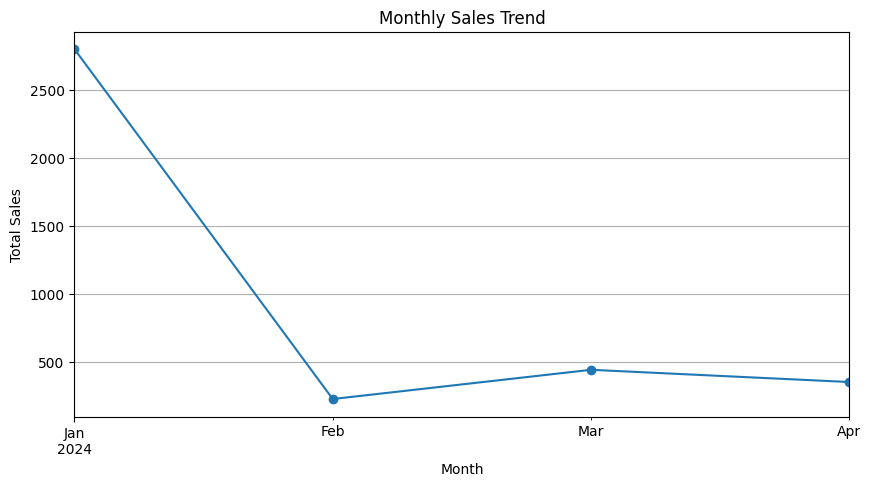

In [4]:
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [5]:
growth_rate = monthly_sales.pct_change() * 100
growth_rate


month
2024-01          NaN
2024-02   -91.964286
2024-03    95.555556
2024-04   -20.454545
Freq: M, Name: total_amount, dtype: float64

In [6]:
top_products = (
    df.groupby("product_name")['total_amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_products


product_name
Smartphone X    1600
Laptop Pro      1200
Smart Watch      300
Sports Shoes     240
Cooking Set      200
Name: total_amount, dtype: int64

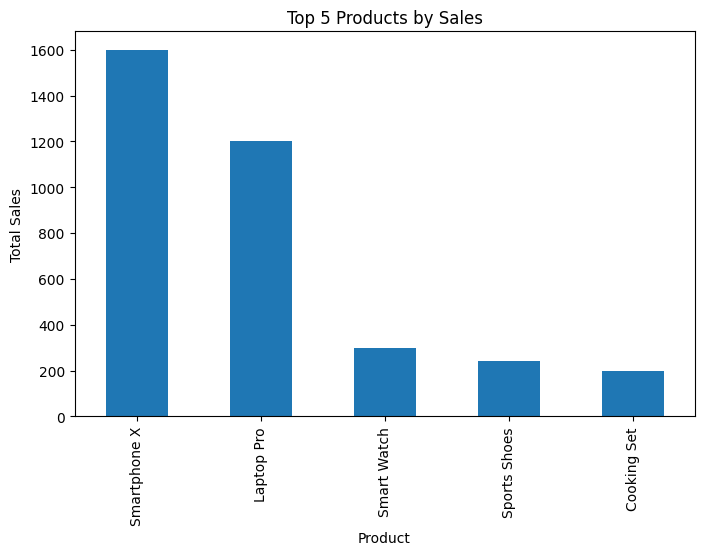

In [7]:
top_products.plot(kind='bar', figsize=(8,5))
plt.title("Top 5 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()


In [8]:
customer_sales = df.groupby("customer_id")['total_amount'].sum()

customer_sales.describe()


count       6.000000
mean      635.833333
std       764.267078
min        50.000000
25%       106.250000
50%       250.000000
75%      1087.500000
max      1840.000000
Name: total_amount, dtype: float64

In [9]:
df.to_csv("../data/processed/cleaned_sales_data.csv", index=False)
